In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Downloading the datasets:
df_movie = pd.read_csv('movies.dat', delimiter = "::", engine='python')
df_movie.dropna(inplace=True)

In [93]:
df_movie.describe()

,id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [94]:
df_movie.isna().sum()

id            0
Movie Name    0
Genre         0
dtype: int64

In [92]:
#Ratings 
df_ratings = pd.read_csv("ratings.dat", delimiter="::", engine="python")
df_ratings.dropna(inplace=True)
df_ratings.describe()

,UserId,MovieId,Ratings,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [91]:
#Users
df_users = pd.read_csv("users.dat", delimiter="::", engine="python")
df_users.dropna(inplace=True)
df_users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [96]:
#Concatenating the datasets
df_data = pd.concat([df_movie, df_ratings, df_users], axis=1)
df_data.dropna()
df_data.head()

,id,Movie Name,Genre,UserId,MovieId,Ratings,Timestamp,UserID,Gender,Age,Occupation,ZipCode
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


In [101]:
df2 = df_data.drop(['Occupation', 'ZipCode', 'Timestamp'], axis=1)
df2

,id,Movie Name,Genre,UserId,MovieId,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,F,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,M,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,M,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,M,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,M,25.0
...,...,...,...,...,...,...,...,...,...
1000204,NaN,NaN,NaN,6040,1091,1,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,1094,5,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,562,5,NaN,NaN,NaN
1000207,NaN,NaN,NaN,6040,1096,4,NaN,NaN,NaN


In [102]:
df2.isna().sum()

id            996326
Movie Name    996326
Genre         996326
UserId             0
MovieId            0
Ratings            0
UserID        994169
Gender        994169
Age           994169
dtype: int64

In [103]:
df = df2.dropna()

In [104]:
df.shape

(3883, 9)

### data visualisation

<Axes: xlabel='Gender', ylabel='count'>

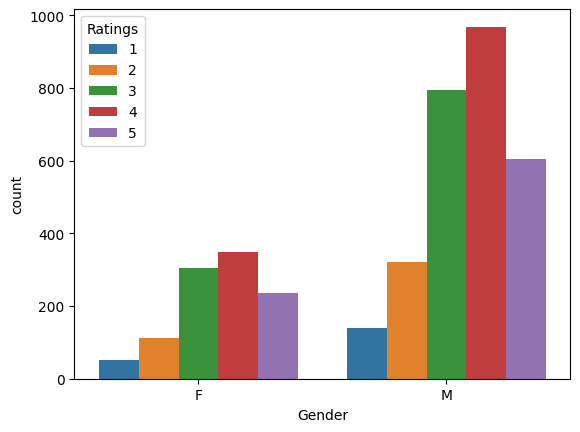

In [105]:
sns.countplot(x=df["Gender"], hue=df["Ratings"])

Text(0.5, 0, 'Frequency')

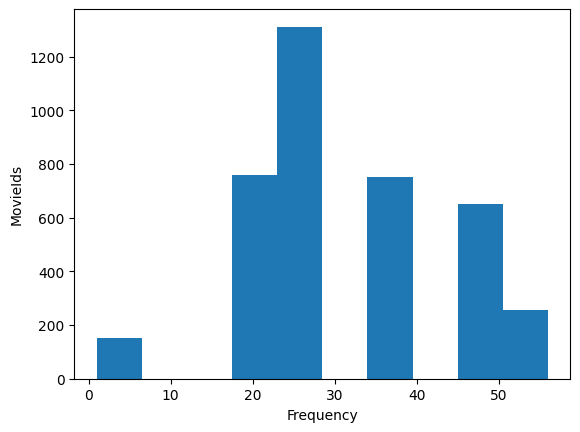

In [110]:
df.Age.plot.hist()
plt.ylabel("MovieIds")
plt.xlabel("Frequency")
#It is observed that people between 20-30 years of age are more likely to rate the movies

<Axes: xlabel='Age', ylabel='count'>

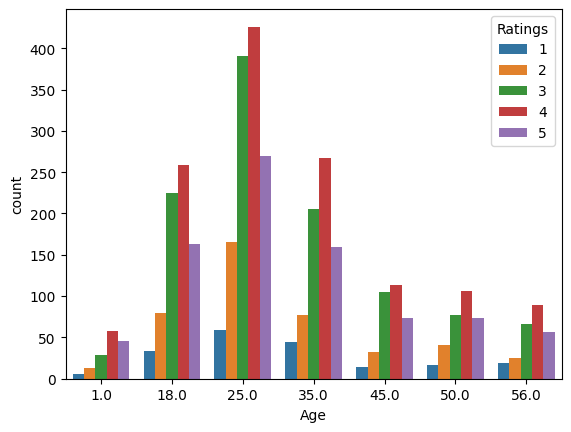

In [111]:
sns.countplot(x=df["Age"], hue=df["Ratings"])

In [112]:
# On the basis of visualisation, we can conclude that the ratings are very much dependent on age, so we drop unnecessary columns

In [114]:
input = df.drop(["Ratings", "Movie Name", "Genre", "MovieId"], axis=1)
target = df["Ratings"]

In [129]:
#replacing 'M' and 'F' with 1 and 0 for modelling
input["Gender"].replace({"M":1, "F":0}, inplace=True)

In [130]:
input

,id,UserId,UserID,Gender,Age
0,1.0,1,1.0,0,1.0
1,2.0,1,2.0,1,56.0
2,3.0,1,3.0,1,25.0
3,4.0,1,4.0,1,45.0
4,5.0,1,5.0,1,25.0
...,...,...,...,...,...
3878,3948.0,28,3879.0,1,25.0
3879,3949.0,28,3880.0,1,25.0
3880,3950.0,28,3881.0,1,18.0
3881,3951.0,28,3882.0,1,56.0


### Generating Training Models

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=2)

In [132]:
X_train

,id,UserId,UserID,Gender,Age
630,635.0,8,631.0,1,35.0
1271,1291.0,11,1272.0,1,18.0
877,889.0,10,878.0,1,18.0
2253,2322.0,19,2254.0,1,35.0
3824,3894.0,27,3825.0,1,18.0
...,...,...,...,...,...
730,739.0,9,731.0,1,45.0
3075,3144.0,23,3076.0,1,35.0
1663,1711.0,15,1664.0,0,18.0
806,816.0,10,807.0,1,18.0


In [137]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
X = model.predict(X_train)


C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 3, 3, ..., 4, 3, 4], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score
score = accuracy_score(X_train, X)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets